## Introduction to Dask

Dask is a flexible library for parallel computing in Python. It allows you to scale your computations to multiple cores or even multiple machines, making it ideal for working with large datasets.

### Key Features

- Parallel computing with task scheduling
- Integration with NumPy, Pandas, and Scikit-Learn
- Distributed computing with Dask.distributed
- Support for out-of-core computation
- Ability to work with large datasets that don't fit into memory

### Dask Data Structures

Dask provides several data structures that are designed to work with large datasets:

- Dask Array: A parallelized version of NumPy arrays
- Dask DataFrame: A parallelized version of Pandas DataFrames
- Dask Bag: A parallelized version of Python's built-in map and filter functions

### Dask Architecture

Dask is built on top of Python's standard multiprocessing and threading modules, and it uses a task scheduler to manage the execution of tasks. The task scheduler is responsible for breaking up large computations into smaller tasks that can be executed in parallel.

### Dask.distributed

Dask.distributed is a distributed computing library that allows you to scale your computations across multiple machines. It provides a client/server architecture that allows you to submit tasks to a cluster of worker nodes.

### Getting Started

To get started with Dask, you can install it using pip, and install dask and dask[distributed]

```
pip install dask
pip install dask[distributed]
pip install dask-ml
```
On zsh you need to escape the brackets:
```pip install "dask[distributed]"``` or ```pip install dask\[distributed\]```

To load the dataset from gcloud you need to install:
```pip install requests aiohttp```

You might also want to install scikit-learn, pandas etc.

In [32]:
import dask
from dask.distributed import Client, progress

from pathlib import Path

Let's begin by starting a local dask cluster. 

In [9]:
if client is not None:
    print("closing previous client")
    client.close()


closing previous client


In [2]:
client = Client(n_workers=4, threads_per_worker=2)
client


/opt/homebrew/Caskroom/miniforge/base/envs/dask-opa/lib/python3.10/contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (7.96s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50552,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:50565,Total threads: 2
Dashboard: http://127.0.0.1:50569/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:50556,


In [34]:
client.close()


If you want to use Kubernetes to distribute computations, you can use something like the following code

```
import dask_kubernetes

cluster = KubeCluster(deploy_mode='local') # Scheduler is started in the notebook process
cluster.scale(10)

client = Client(cluster)
```

In [4]:
# %%time

import dask.array as da

sample = 1_000_000_000  # <- this is huge!
xxyy = da.random.uniform(-1, 1, size=(2, sample))
norm = da.linalg.norm(xxyy, axis=0)
summ = da.sum(norm <= 1)
insiders = summ.compute()
pi = 4 * insiders / sample
print("pi ~= {}".format(pi))

pi ~= 3.141576592


Let's do the same thing with numpy.

In [6]:
# %%time

import numpy as np

# sample = 1_000_000_000  # <- this is huge!
sample = 10_000_000  # <- this is huge!
xxyy = np.random.uniform(-1, 1, size=(2, sample))
norm = np.linalg.norm(xxyy, axis=0)
summ = np.sum(norm <= 1)
insiders = summ
pi = 4 * insiders / sample
print("pi ~= {}".format(pi))

pi ~= 3.1413604


The code does not run with numpy, utilizing over 26GB of memory before crashing the kernel. 

Arrays are not that interesting for us, let's try using dask for dataframes.

In [7]:
import dask.dataframe as dd

In [8]:
# %%time

# train_df = dd.read_csv('https://storage.googleapis.com/obd-dask23/train.csv')
train_df = dd.read_csv('./data/obd-dask23/train.csv')

In [9]:
%%time
train_df

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
npartitions=89,,,,,,,,
,object,float64,object,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [10]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-10-12 23:47:39.0000002,9.00,2014-10-12 23:47:39 UTC,-73.973863,40.764248,-73.986874,40.736618,1
1,2012-08-17 22:34:00.000000118,4.10,2012-08-17 22:34:00 UTC,-73.997062,40.722330,-73.997642,40.729135,1
2,2011-05-17 13:11:00.000000229,9.70,2011-05-17 13:11:00 UTC,-74.000002,40.727167,-73.984253,40.753135,2
3,2015-03-08 09:10:25.0000005,57.33,2015-03-08 09:10:25 UTC,-74.004166,40.737652,-73.795753,40.644497,2
4,2010-03-27 19:54:44.0000001,7.30,2010-03-27 19:54:44 UTC,-73.990309,40.751309,-73.980597,40.761481,1


Let's do the same thing with pandas

In [9]:
%%time
import pandas as pd
train_df_pd =  pd.read_csv('./data/obd-dask23/train.csv')
train_df_pd.head()

CPU times: user 50.8 s, sys: 23.6 s, total: 1min 14s
Wall time: 1min 53s


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-10-12 23:47:39.0000002,9.00,2014-10-12 23:47:39 UTC,-73.973863,40.764248,-73.986874,40.736618,1
1,2012-08-17 22:34:00.000000118,4.10,2012-08-17 22:34:00 UTC,-73.997062,40.722330,-73.997642,40.729135,1
2,2011-05-17 13:11:00.000000229,9.70,2011-05-17 13:11:00 UTC,-74.000002,40.727167,-73.984253,40.753135,2
3,2015-03-08 09:10:25.0000005,57.33,2015-03-08 09:10:25 UTC,-74.004166,40.737652,-73.795753,40.644497,2
4,2010-03-27 19:54:44.0000001,7.30,2010-03-27 19:54:44 UTC,-73.990309,40.751309,-73.980597,40.761481,1


Python went to 18GB of memory usage for a 5GB file... Unless you have enough swap this will crash.

In [11]:
train_df_pd.__sizeof__() * 1e-9

11.785351342

In [16]:
del train_df_pd

NameError: name 'train_df_pd' is not defined

### Some processing with Dask

In [11]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
npartitions=89,,,,,,,,
,object,float64,object,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [12]:
len(train_df)

55413856

In [13]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-10-12 23:47:39.0000002,9.00,2014-10-12 23:47:39 UTC,-73.973863,40.764248,-73.986874,40.736618,1
1,2012-08-17 22:34:00.000000118,4.10,2012-08-17 22:34:00 UTC,-73.997062,40.722330,-73.997642,40.729135,1
2,2011-05-17 13:11:00.000000229,9.70,2011-05-17 13:11:00 UTC,-74.000002,40.727167,-73.984253,40.753135,2
3,2015-03-08 09:10:25.0000005,57.33,2015-03-08 09:10:25 UTC,-74.004166,40.737652,-73.795753,40.644497,2
4,2010-03-27 19:54:44.0000001,7.30,2010-03-27 19:54:44 UTC,-73.990309,40.751309,-73.980597,40.761481,1


In [14]:
train_df.groupby(train_df.passenger_count).fare_amount.mean().compute()

passenger_count
0       9.015400
1      11.216398
2      11.838426
3      11.540684
4      11.766121
5      11.208482
6      12.126306
8      29.981111
208     8.975000
51      9.300000
129     8.900000
7      31.788667
9      36.993043
34     13.300000
49      2.500000
Name: fare_amount, dtype: float64

Takes something like 100ms / 1s with pandas 

Dask evaluates lazily, so we need to call compute to get the result, and if called again it will start from scratch. Persist will keep the result in memory.

In [15]:
train_df.groupby(train_df.passenger_count).fare_amount.mean().persist()

Dask Series Structure:
npartitions=1
    float64
        ...
Name: fare_amount, dtype: float64
Dask Name: truediv, 1 graph layer

In [17]:
train_df.groupby(train_df.passenger_count).fare_amount.mean().compute()

passenger_count
0       9.015400
1      11.216398
2      11.838426
3      11.540684
4      11.766121
5      11.208482
6      12.126306
8      29.981111
208     8.975000
51      9.300000
129     8.900000
7      31.788667
9      36.993043
34     13.300000
49      2.500000
Name: fare_amount, dtype: float64

In [18]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs().persist()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs().persist()


In [19]:
add_travel_vector_features(train_df)

In [20]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2014-10-12 23:47:39.0000002,9.00,2014-10-12 23:47:39 UTC,-73.973863,40.764248,-73.986874,40.736618,1,0.013011,0.027630
1,2012-08-17 22:34:00.000000118,4.10,2012-08-17 22:34:00 UTC,-73.997062,40.722330,-73.997642,40.729135,1,0.000580,0.006805
2,2011-05-17 13:11:00.000000229,9.70,2011-05-17 13:11:00 UTC,-74.000002,40.727167,-73.984253,40.753135,2,0.015749,0.025968
3,2015-03-08 09:10:25.0000005,57.33,2015-03-08 09:10:25 UTC,-74.004166,40.737652,-73.795753,40.644497,2,0.208412,0.093155
4,2010-03-27 19:54:44.0000001,7.30,2010-03-27 19:54:44 UTC,-73.990309,40.751309,-73.980597,40.761481,1,0.009712,0.010172


In [24]:
train_df.groupby(train_df.abs_diff_latitude).fare_amount.mean().persist()

Dask Series Structure:
npartitions=1
    float64
        ...
Name: fare_amount, dtype: float64
Dask Name: truediv, 1 graph layer

In [26]:
train_df.groupby(train_df.abs_diff_latitude).fare_amount.mean().persist().compute()

abs_diff_latitude
0.000000e+00    11.616878
1.000000e-06    22.578450
1.000000e-06    23.061467
2.000000e-06    23.249756
2.000000e-06    22.854250
                  ...    
2.418709e+03     7.300000
2.504006e+03     4.500000
2.516411e+03     8.000000
3.114291e+03     6.100000
5.068096e+03    12.500000
Name: fare_amount, Length: 554465, dtype: float64

In [27]:
import matplotlib.pyplot as plt

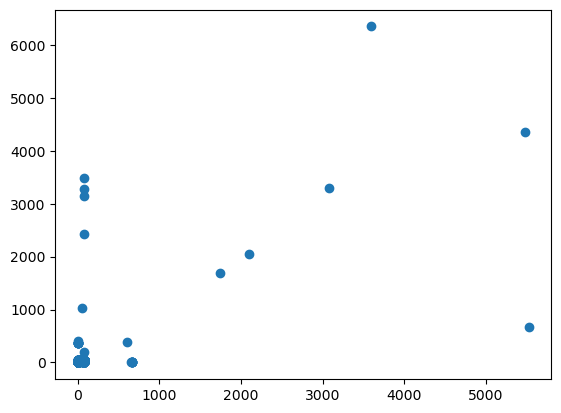

In [28]:
train_df: dd.DataFrame
subset_df = train_df.sample(frac=0.01)

x, y = subset_df["abs_diff_longitude"], subset_df["abs_diff_latitude"]

plt.scatter(x, y)
plt.show()

In [29]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)].persist()
print('New size: %d' % len(train_df))

Old size: 55413856
New size: 55298943


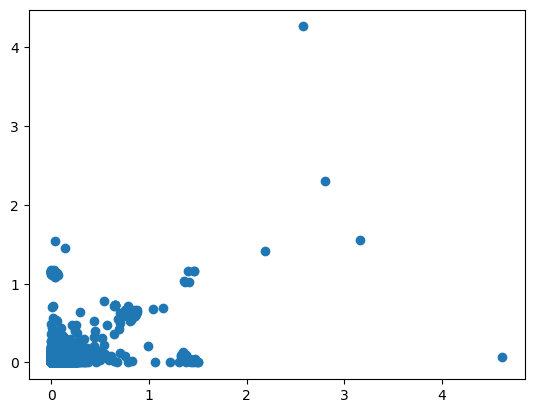

In [30]:
subset_df = train_df.sample(frac=0.01)

x, y = subset_df["abs_diff_longitude"], subset_df["abs_diff_latitude"]

plt.scatter(x, y)
plt.show()

In [31]:
train_df.describe().compute()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
count,5.529894e+07,5.529894e+07,5.529894e+07,5.529894e+07,5.529894e+07,5.529894e+07,5.529894e+07,5.529894e+07
mean,1.133683e+01,-7.257290e+01,3.995280e+01,-7.257205e+01,3.995314e+01,1.685440e+00,2.251316e-02,2.110157e-02
std,2.071499e+01,1.094742e+01,7.044005e+00,1.094731e+01,7.044055e+00,1.326790e+00,3.854502e-02,2.903143e-02
min,-3.000000e+02,-3.440696e+03,-3.488080e+03,-3.440696e+03,-3.488080e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399201e+01,4.073514e+01,-7.399136e+01,4.073421e+01,1.000000e+00,5.827000e-03,6.606000e-03
50%,8.500000e+00,-7.398174e+01,4.075281e+01,-7.398010e+01,4.075332e+01,1.000000e+00,1.244900e-02,1.387000e-02
75%,1.250000e+01,-7.396703e+01,4.076725e+01,-7.396365e+01,4.076821e+01,2.000000e+00,2.370300e-02,2.697000e-02
max,9.396336e+04,3.456223e+03,3.378013e+03,3.456223e+03,3.378013e+03,2.080000e+02,4.989833e+00,4.991325e+00


### Parallelization of any computation

Another very useful thing about dask is parallelization of loops etc.

In [47]:
import dask
from dask.distributed import Client, progress

import dask.dataframe as dd

from pathlib import Path

In [48]:
client.close()

In [49]:
client = Client(n_workers=8, threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64692,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:64711,Total threads: 1
Dashboard: http://127.0.0.1:64712/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:64695,


In [71]:
train_df = dd.read_csv('./data/obd-dask23/train.csv')

In [51]:
df_len = len(train_df)

In [12]:
# let's cut the dataframe into multiple chunks 100th of the original size, and save to disk in parquet format

train_df: dd.DataFrame
Path("./data/obd-dask23/partitions").mkdir(parents=True, exist_ok=True)

train_df = train_df.repartition(npartitions=100)

train_df.to_csv('./data/obd-dask23/partitions/data-*.csv')

['/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-00.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-01.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-02.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-03.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-04.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-05.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-06.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-07.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/data/obd-dask23/partitions/data-08.csv',
 '/Users/arthur/Dev/SDD - dev/Outils du Big Data/OBD/notebooks/d

The first 10 files will fit in memory if concatenated in pandas, so let's load them in a loop.

In [52]:
import pandas as pd


In [53]:
df = pd.read_csv(list(Path("./data/obd-dask23/partitions/").glob("*.csv"))[0])
df.__len__()

622767

In [56]:
files_to_load = list(Path("./data/obd-dask23/partitions/").glob("*.csv"))[:10]
n_lines = 622767 // 4

In [57]:
dfs = []

for file in files_to_load:
    df = pd.read_csv(file, nrows=n_lines)
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="mixed", yearfirst=True)
    dfs.append(df)

dfs = pd.concat(dfs)

The dask.delayed syntax to parallelize such a loop is very simple:

In [58]:
@dask.delayed()
def read_csv(file):
    df = pd.read_csv(file, nrows=n_lines)
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="mixed", yearfirst=True)
    return df

In [59]:
dfs = []

for file in files_to_load:
    dfs.append(read_csv(file))

dfs = dask.compute(*dfs)

dfs = pd.concat(dfs)

In [60]:
# use already existing functions with dask.delayed
def convert_datetime(df):
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="mixed", yearfirst=True)
    return df

futures_csv = []

for file in files_to_load:
    future_csv = dask.delayed(pd.read_csv)(file, nrows=n_lines)
    futures_csv.append(future_csv)


dfs = []
for future_csv in futures_csv:
    future_datetime = dask.delayed(convert_datetime)(future_csv)
    dfs.append(future_datetime)

dfs = dask.compute(*dfs)


### Futures
Dask supports a real-time task framework that extends Python’s ``concurrent.futures`` interface. Dask futures allow you to scale generic Python workflows across a Dask cluster with minimal code changes
[Dask futures](https://docs.dask.org/en/stable/futures.html)


In [61]:
def convert_datetime(df):
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="mixed", yearfirst=True)
    return df

futures_csv = []

for file in files_to_load:
    future_csv = client.submit(pd.read_csv, file, nrows=n_lines)
    futures_csv.append(future_csv)

# dfs = []
# for future_csv in futures_csv:
#     future_datetime = client.submit(convert_datetime, future_csv)
#     dfs.append(future_datetime)

# another syntax that can be used with a list of inputs is client.map:
dfs = client.map(convert_datetime, futures_csv)

dfs = client.gather(dfs)


In [62]:
dfs = pd.concat(dfs)
dfs

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2011-03-18 01:47:41.0000002,11.70,2011-03-18 01:47:41+00:00,-73.967460,40.756201,-73.960501,40.799185,1
1,1,2013-09-12 07:34:00.000000171,18.33,2013-09-12 07:34:00+00:00,-73.955612,40.745747,-73.989672,40.739552,5
2,2,2012-04-23 11:26:12.0000002,8.50,2012-04-23 11:26:12+00:00,-73.955258,40.776993,-73.939162,40.804428,1
3,3,2009-05-26 22:39:00.0000008,4.90,2009-05-26 22:39:00+00:00,-74.004892,40.713570,-73.994533,40.745137,5
4,4,2015-02-13 12:44:04.0000001,12.50,2015-02-13 12:44:04+00:00,-74.005699,40.745651,-74.005692,40.724895,2
...,...,...,...,...,...,...,...,...,...
51868,51868,2011-12-22 20:01:02.0000005,4.10,2011-12-22 20:01:02+00:00,-73.955424,40.779710,-73.961958,40.770720,1
51869,51869,2011-07-15 00:35:00.00000013,4.90,2011-07-15 00:35:00+00:00,-73.972193,40.750230,-73.981020,40.741197,1
51870,51870,2013-10-04 22:51:00.000000215,7.00,2013-10-04 22:51:00+00:00,-74.003397,40.723872,-73.996390,40.737852,1
51871,51871,2012-10-16 19:13:00.000000107,12.50,2012-10-16 19:13:00+00:00,-73.994145,40.751028,-73.961713,40.757007,3


### Dask for ML computations

Dask can help parallelize ML computations, with its built-in functions or by distributing sklearn, xgboost, etc.<br>
It allows scaling things like RandomSearch, having huge Random Forests, etc.

[Dask ML](https://ml.dask.org)

In [72]:
train_df = dd.read_csv('./data/obd-dask23/train.csv')

In [73]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs().persist()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs().persist()
    return df

train_df = add_travel_vector_features(train_df)

In [77]:
def get_input_matrix(df):
    df = df.dropna(how="any")
    x = df[["abs_diff_longitude", "abs_diff_latitude", "passenger_count"]].to_dask_array(lengths=True)
    y = df["fare_amount"].to_dask_array(lengths=True)
    return x.persist(), y.persist()


In [78]:
train_sample_df = train_df.sample(frac=0.01, random_state=270120)
train_sample_X, train_sample_y = get_input_matrix(train_sample_df)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    "n_estimators": range(4, 10, 2),
    "max_depth": range(10, 40, 5),
}

In [82]:
import joblib

with joblib.parallel_backend("dask"):
    clf = RandomForestRegressor()
    search = RandomizedSearchCV(clf, param_space, cv=2, n_iter=50)

    search.fit(train_sample_X, train_sample_y)

/opt/homebrew/Caskroom/miniforge/base/envs/dask-opa/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [83]:
search.best_params_

{'n_estimators': 6, 'max_depth': 10}

You can also use Dask's build in RandomisezedSearchCV, which is a drop-in replacement for sklearn's RandomizedSearchCV.

In [85]:
from dask_ml.model_selection import RandomizedSearchCV as RandomizedSearchCVDask

In [86]:
clf = RandomForestRegressor()
search = RandomizedSearchCVDask(clf, param_space, random_state=0, cv=2, n_iter=50)

search.fit(train_sample_X, train_sample_y)
search.best_params_

/opt/homebrew/Caskroom/miniforge/base/envs/dask-opa/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 8, 'max_depth': 10}

In [87]:
search.best_score_

0.7237662133590458

Adapted from :

[Supaero Data Science](https://github.com/SupaeroDataScience/OBD/blob/master/notebooks/EvaluationDaskMLTaxyCabEmpty.ipynb)<br>
[Completed version on my github](https://github.com/arthurlaquieze/OBD/blob/master/notebooks/EvaluationDaskMLTaxyCab_Laquièze_Arthur.ipynb)

MIT License

Copyright (c) 2020 ISAE-SUPAERO Data Science - Master of Science program

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
